<a href="https://colab.research.google.com/github/CarmenRaposo/06MAIR-Aprendizaje-No-Supervisado-Trabajo-Final/blob/master/Trabajo%20Final/Trabajo_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Aplicar el algoritmo KMeans al dataset iris con 3 atributos.

In [0]:
import numpy as np
import pandas as pd
import itertools as it
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn import datasets

(150, 4)


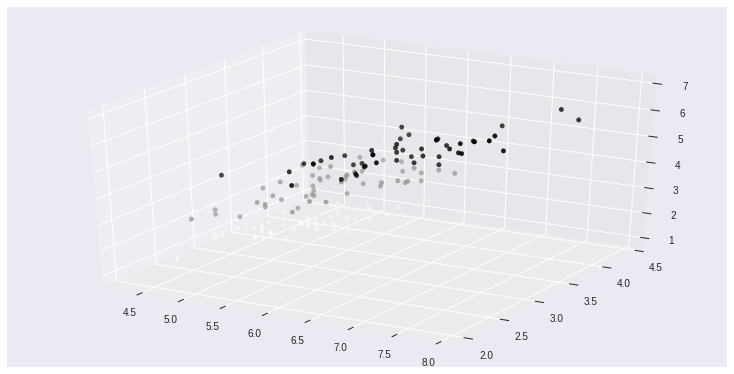

In [84]:
iris = datasets.load_iris()
Dx = iris.data[:, :3]  # we only take the first three features.
Dy = iris.target
print(iris.data.shape)

fig = plt.figure(figsize=(10,5))
ax = Axes3D(fig)
ax.scatter(Dx[:,0],Dx[:,1],Dx[:,2], c=Dy)

Los centros iniciales elegidos aleatoriamente son:
[[6.3236951  4.37292283 5.50401602]
 [4.48267326 4.11464573 2.52239527]
 [7.17153591 3.54198841 4.15564334]]


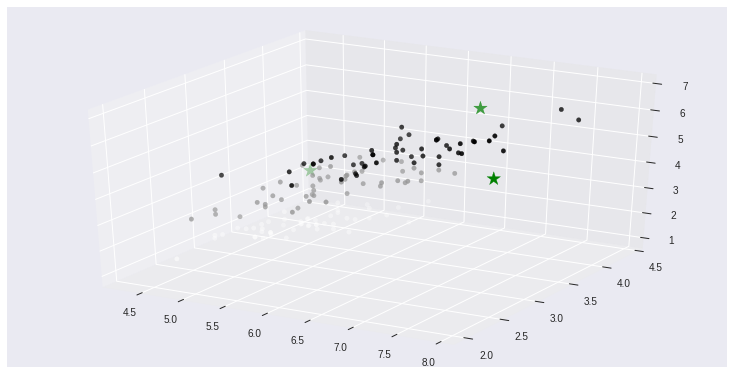

In [79]:
# Elegimos un número de clústeres a buscar
K = 3

cDx = np.zeros(K*Dx.shape[1])
cDx.shape = (K,Dx.shape[1])

def random_sample_float(n, mi, ma):
    return (ma - mi) * np.random.random_sample(n) + mi

for d in np.arange(Dx.shape[1]):
    cDx[:,d] = random_sample_float(K, np.min(Dx[:,d]), np.max(Dx[:,d]))

print('Los centros iniciales elegidos aleatoriamente son:')
print(cDx)


fig = plt.figure(figsize=(10,5))
ax = Axes3D(fig)
ax.scatter(Dx[:,0],Dx[:,1],Dx[:,2], c=Dy)
ax.scatter(cDx[:,0],cDx[:,1],cDx[:,2], marker='*', s=200, c='g')



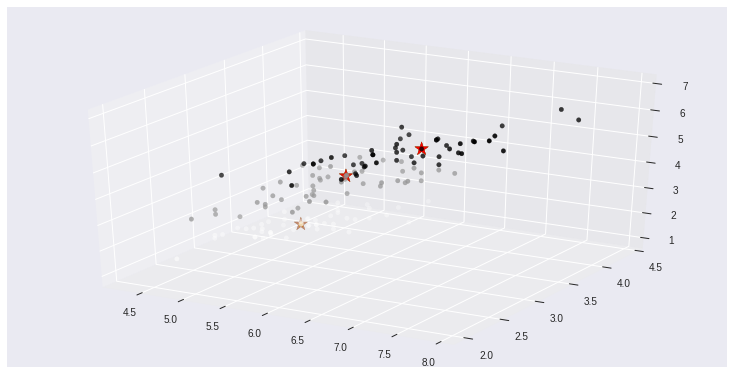

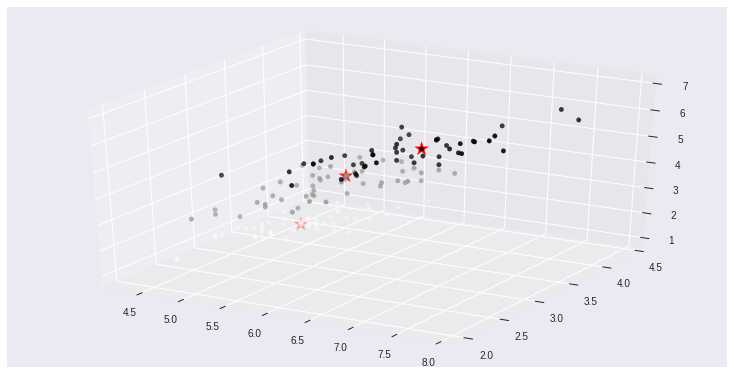

In [81]:
# Definimos la distancia euclidiana de una instancia x 
# con respecto a un grupo de instancias C
def distancia_euclidiana_grupo(x, C):   
    return np.sqrt(np.sum(np.power(C-x,2),axis=1))

# Preparamos el vector donde guardamos la asignación de cada elemento 
# a un clúster (1,...,K)
Dyp = np.zeros(Dx.shape[0])

fig = plt.figure(figsize=(10,5))
ax = Axes3D(fig)
ax.scatter(Dx[:,0],Dx[:,1],Dx[:,2], c=Dy)
ax.scatter(cDx[:,0],cDx[:,1],cDx[:,2], marker='*', s=200, c='g')

# Flag de convergencia
iterando = True


while iterando:

    # Vector auxiliar para guardar los centros de la iteración pasada
    # necesarios para identificar la convergencia
    cDx_ant = cDx.copy()

    # Buscamos el centro más cercano a cada instancia y la asignamos a ese clúster
    for i in np.arange(Dx.shape[0]):
        pred_y = np.argmin([np.sqrt(np.sum(np.power((Dx[i,:]-cDx_ant[k,:]),2))) for k in range(K)])
        Dyp[i] = pred_y
        
    
    # Calcular los nuevos centros
    for k in range(K):
         cDx[k,:] = Dx[Dyp==k,:][np.argmin([np.sum(distancia_euclidiana_grupo(Dx[i,:],Dx[Dyp==k,:]))
                  for i in np.where(Dyp==k)[0]])]
    
    for k in np.arange(K):
        ax.plot( [cDx_ant[k,0], cDx[k,0]],[cDx_ant[k,1], cDx[k,1]],[cDx_ant[k,2], cDx[k,2]], linestyle='-', marker='*', c='y')
    
    iterando = (np.absolute(np.sum(cDx-cDx_ant)) > 0.00001)

ax.scatter(cDx[:,0],cDx[:,1],cDx[:,2], marker='*', s=200, c='r')

# Ver asignaciones finales
fig = plt.figure(figsize=(10,5))
ax = Axes3D(fig)
ax.scatter(Dx[:,0],Dx[:,1],Dx[:,2], c=Dy)
ax.scatter(cDx[:,0],cDx[:,1],cDx[:,2], marker='*', s=200, c='r')



In [85]:
 def matriz_confusion(cat_real, cat_pred):
    cats = np.unique(cat_real)
    clusts = np.unique(cat_pred)
    mat = np.array([[np.sum(np.logical_and(cat_real==cats[i], cat_pred==clusts[j]
                                          )) 
                     for j in np.arange(clusts.size)] 
                    for i in np.arange(cats.size)])
    return(mat)
  
def medida_error(mat):
    assign = np.sum([np.max(mat[l,:]) for l in np.arange(mat.shape[0])])
    return 1 - assign / float(np.sum(mat))

def medida_precision(mat, l, k):
    return mat[l,k]/float(np.sum(mat[:,k]))

def medida_recall(mat, l, k):
    return mat[l,k]/float(np.sum(mat[l,:]))
  
def medida_pureza(mat):
    totales = np.sum(mat,0)/float(np.sum(mat))
    return np.sum([totales[k]
                   * np.max(mat[:,k]/float(np.sum(mat[:,k]))) for k in np.arange(mat.shape[1])])
  
def medida_f1_especifica(mat, l, k):
    prec = medida_precision(mat, l, k)
    rec = medida_recall(mat, l, k)
    if (prec+rec)==0:
        return 0
    else:
        return 2*prec*rec/(prec+rec)

def medida_f1(mat):
    totales = np.sum(mat,1)/float(np.sum(mat))
    assign = np.sum([totales[l] * np.max([medida_f1_especifica(mat, l, k) 
                                          for k in np.arange(mat.shape[1])]) 
                     for l in np.arange(mat.shape[0])])
    return assign

mC = matriz_confusion(Dy,Dyp)

print(mC)
print('El valor del error cometido es = ', medida_error(mC))
print('La pureza del agrupamiento obtenido es = ', medida_pureza(mC), ' (** ESTE ES EL RESULTADO A INCLUIR EN EL CAMPUS**)')
print('El valor F1 es = ', medida_f1(mC))

[[ 0 50  0]
 [ 3  1 46]
 [36  0 14]]
El valor del error cometido es =  0.12
La pureza del agrupamiento obtenido es =  0.8800000000000001  (** ESTE ES EL RESULTADO A INCLUIR EN EL CAMPUS**)
El valor F1 es =  0.8784838034365233


Centros encontrados por...
el método programado
[[6.7 3.1 5.6]
 [5.  3.4 1.5]
 [6.  2.9 4.5]]
el método de Sci-kit Learn
[[6.83571429 3.06428571 5.6547619 ]
 [5.006      3.428      1.462     ]
 [5.84655172 2.73275862 4.3637931 ]]
Matriz de confusión:
[[ 0 50  0]
 [ 5  0 45]
 [37  0 13]]
El valor del error cometido es =  0.12
La pureza del agrupamiento obtenido es =  0.8799999999999999
El valor F1 es =  0.8792270531400966


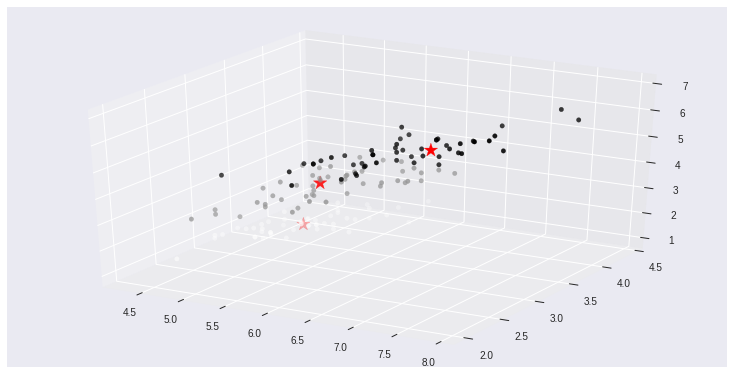

In [90]:
from sklearn.cluster import KMeans

# Se inicializa KMeans con el número de clústeres a buscar
modelo = KMeans(n_clusters=3)
# Se aprende el 
modelo = modelo.fit(Dx)
# Predicting the clusters
Dyp_sk = modelo.predict(Dx)
# Obtener los centros de los clústeres
cDx_sk = modelo.cluster_centers_

# Comparing with scikit-learn centroids
print("Centros encontrados por...")
print("el método programado")
print(cDx)
print("el método de Sci-kit Learn")
print(cDx_sk)


mC_sk = matriz_confusion(Dy,Dyp_sk)

print('Matriz de confusión:')
print(mC_sk)
print('El valor del error cometido es = ', medida_error(mC_sk))
print('La pureza del agrupamiento obtenido es = ', medida_pureza(mC_sk))
print('El valor F1 es = ', medida_f1(mC_sk))

# Ver asignaciones finales
fig = plt.figure(figsize=(10,5))
ax = Axes3D(fig)
ax.scatter(Dx[:,0],Dx[:,1],Dx[:,2], c=Dy)
ax.scatter(cDx_sk[:,0],cDx_sk[:,1],cDx_sk[:,2], marker='*', s=200, c='r')
